In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
!ls

Habitat.pdf                         Structure.pdf
Hmm_models.pdf                      hmm_model_subfamily_counts.csv
Length.pdf                          hmm_model_subfamily_counts.xlsx
Simplified_tree_v1.psd              plot_habitat_length_structure.ipynb
Simplified_tree_v2.1.jpg            test.pdf
Simplified_tree_v2.1.psd            tmp.pdf
Simplified_tree_v2.1.tif            viro_ID_subfamily.csv
Simplified_tree_v2.2.jpg            viro_ID_subfamily2.csv
Simplified_tree_v2.2.pdf            viro_ID_subfamily2.xlsx
Simplified_tree_v2.2.tif            ~$hmm_model_subfamily_counts.xlsx
Simplified_tree_v2.psd


In [56]:
dft1 = pd.read_csv("viro_ID_subfamily2.csv")
dft2 = pd.read_csv("/Users/jzz0026/Google_superjohnlove/Virophages_IMG_2018-02-16/jupyter/four-core-tree/itol_habitat_v2.txt")

dft2["tem"] = dft2["0"].str.replace("_____"," ").str.replace("_"," ")
dft = pd.merge(dft2,dft1,left_on="tem",right_on="ID",how="left")

## add subfamily and habitat
dft = dft[["tem","Habitat color","Habitat","Subfamily"]]
add = pd.Series(["ATamarense",np.nan,np.nan,1], index=dft.columns)
dft = dft.append(add,ignore_index=True)
dft["Subfamily"] = dft["Subfamily"].astype("int")
dft = dft.sort_values("Subfamily")
dft.columns = ['ID', 'Habitat color', 'Habitat', 'Subfamily']
dft.head()

## add length
length = !cat /Users/jzz0026/Google_superjohnlove/Virophages_IMG_2018-02-16/jupyter/four-core-tree/itol/iTol_length.txt |  sed -n '82,$p' | sed '$d'| sed '$d'| sed '$d' | grep ","
dflen = pd.DataFrame(length)
dflen = dflen[0].str.split(",",expand=True)
dflen[0] = dflen[0].str.replace("_+"," ")
dft = pd.merge(dft,dflen,left_on="ID",right_on=0,how="left")
dft = dft[['ID', 'Habitat color', 'Habitat', 'Subfamily', 1]]

## add complete genome
dfstru = pd.read_csv("/Users/jzz0026/Google_superjohnlove/Virophages_IMG_2018-02-16/jupyter/four-core-tree/itol/Structure.csv",header=None)
dfstru[0] = dfstru[0].str.replace("_+"," ")
dft = pd.merge(dft,dfstru,left_on="ID",right_on=0,how="left")
#TT = pd.merge(dfstru,dft,left_on=0,right_on="ID",how="left")
dft = dft[['ID', 'Habitat color', 'Habitat', 'Subfamily', '1_x', '1_y']]
dft.columns = ['ID', 'Habitat color', 'Habitat', 'Subfamily', 'Length', 'Structure']
dft["Habitat"] = dft["Habitat"].str.replace('Host\(algae\)','Host(plankton)')
dft.loc[0,"Habitat color"] = "#efffd1"
dft.loc[0,"Habitat"] = "Host(plankton)"
dft.head()
a = [a for a in dft["Habitat"].unique() if "Engineered" in a]
#dft.loc[dft["Habitat"] == "Freshwater|Engineered","Habitat"] = "Freshwater"
#dft.loc[dft["Habitat"] == "Terrestrial(soil)|Engineered","Habitat"] = "Terrestrial(soil)"


/Users/jzz0026/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


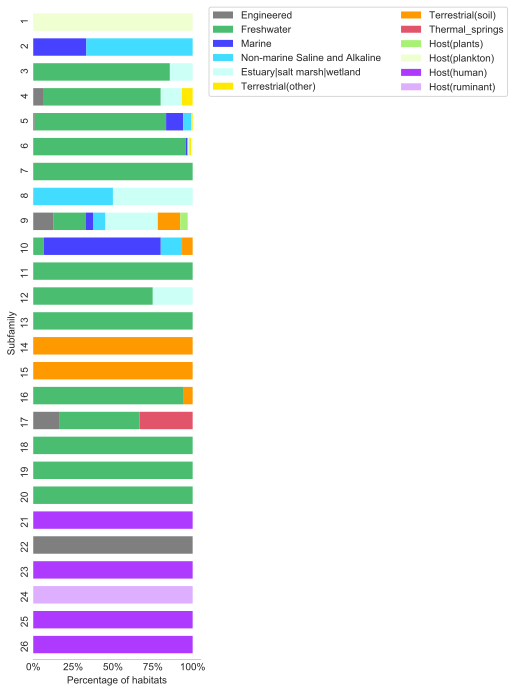

In [57]:
## sort habitat
sort_habitat = ['Engineered','Freshwater', 'Marine', 
 'Non-marine Saline and Alkaline','Estuary|salt marsh|wetland','Terrestrial(other)', 
 'Terrestrial(soil)', 'Thermal_springs','Host(plants)','Host(plankton)', 'Host(human)', 'Host(ruminant)']


## sort color
dfcol = dft[["Habitat","Habitat color"]]
dfcol = dfcol.sort_values("Habitat")
dfcol1 = dfcol["Habitat"].unique()
dfcol2 = dfcol["Habitat color"].unique()
dfcol = pd.DataFrame([dfcol1,dfcol2]).T.set_index(0).loc[sort_habitat]

## get pivot table
dfhab = dft.pivot_table(index='Subfamily', columns='Habitat',values="ID", aggfunc='count').T
dfhab = dfhab/dfhab.sum()
head = list(dfhab.columns)
head = head[::-1] ## reverse y axis
dfhab = dfhab[head]
dfhab = dfhab.loc[sort_habitat]

## plot stacked bar plot
fig = dfhab.T.plot(kind='barh',colors=dfcol[1], stacked=True,figsize=(3,12),width=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 10},ncol=2,frameon=True)
plt.yticks(rotation=90)
yl = fig.get_xticks()
xxx = [str(int(each))+"%" for each in list(yl * 100)]
fig.set(xticklabels=xxx)
sns.despine(left=True,right=True)
fig.grid(False)
plt.xlabel("Percentage of habitats")
plt.savefig('Habitat.pdf', bbox_inches='tight')
plt.show()

In [20]:
dfcol

,1
0,
Engineered,#7f7f7f
Terrestrial(soil)|Engineered,#d1d1d1
Freshwater|Engineered,#f9f9f9
Freshwater,#4bbd70
Marine,#4742ff
Non-marine Saline and Alkaline,#41dcff
Estuary|salt marsh|wetland,#ccfff6
Terrestrial(other),#ffe900
Terrestrial(soil),#ff9900


/Users/jzz0026/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jzz0026/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jzz0026/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

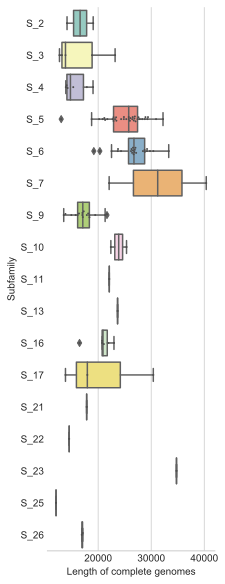

In [21]:
df_len_stru = dft[dft["Structure"].notnull()]
df_len_stru["Subfamily"] = df_len_stru["Subfamily"].astype(str)
df_len_stru["Length"] = df_len_stru["Length"].astype("int")

fig, ax = plt.subplots()
fig.set_size_inches(3, 10)
sns.set_style("whitegrid")
df_len_stru["Subfamily"] = "S_" + df_len_stru["Subfamily"]

sns.boxplot(x="Length", y="Subfamily", data=df_len_stru,palette="Set3")
sns.swarmplot(x="Length", y="Subfamily", data=df_len_stru,size=2, color=".3", linewidth=0)
sns.despine(left=True)
plt.xlabel("Length of complete genomes")
plt.savefig('Length.pdf', bbox_inches='tight')
plt.show()

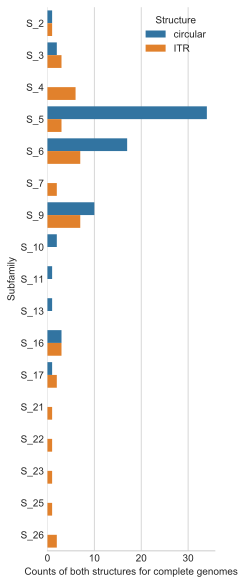

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(3, 10)
sns.set_style("whitegrid")

sns.countplot(y="Subfamily",hue="Structure", data=df_len_stru)
sns.despine(left=True)
plt.xlabel("Counts of both structures for complete genomes")

plt.savefig('Structure.pdf', bbox_inches='tight')
plt.show()

/Users/jzz0026/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


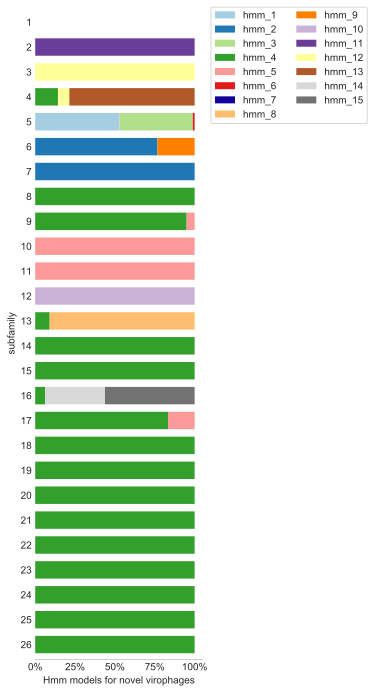

In [6]:
df_hmm = pd.read_csv("hmm_model_subfamily_counts.csv")
filter_col = ['subfamily'] + [a for a in df_hmm.columns if "hmm" in a]
df_hmm_filter = df_hmm.loc[:,filter_col]
df_hmm_filter = df_hmm_filter.set_index("subfamily")
df_hmm_filter_per = df_hmm_filter.div(df_hmm_filter.sum(1), axis=0)
reverse_ind = list(reversed(df_hmm_filter_per.index))
df_hmm_filter_per = df_hmm_filter_per.loc[reverse_ind]

dft = pd.read_csv("/Users/jzz0026/Google_superjohnlove/Virophages_IMG_2018-02-16/jupyter/four-core-tree/itol_hmm_v1.txt").iloc[:,-2:]
dft = dft.drop_duplicates()
dfcol = dft.set_index("MCP model").loc[df_hmm_filter_per.columns]
dfcol.loc["hmm_7","MCP model color"] = "#110099"

fig = df_hmm_filter_per.plot(kind='barh', stacked=True,figsize=(3,12),width=0.7,colors=dfcol["MCP model color"])
sns.despine(left=True,right=True)
plt.grid(False)
yl = fig.get_xticks()
xxx = [str(int(each))+"%" for each in list(yl * 100)]
fig.set(xticklabels=xxx)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 10},ncol=2,frameon=True)
plt.xlabel("Hmm models for novel virophages")
plt.savefig('Hmm_models.pdf', bbox_inches='tight')

In [7]:

dft = pd.read_csv("/Users/jzz0026/Google_superjohnlove/Virophages_IMG_2018-02-16/jupyter/four-core-tree/itol_hmm_v1.txt").iloc[:,-2:]
dft = dft.drop_duplicates()
dfcol = dft.set_index("MCP model").loc[df_hmm_filter_per.columns]
dfcol.loc["hmm_7","MCP model color"] = "#110099"


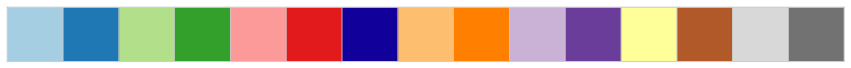

In [8]:
sns.palplot(list(dfcol["MCP model color"].dropna()))